In [49]:
from qiskit import QuantumCircuit, Aer, transpile
import numpy as np
import itertools as it
import time
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import circuit_maker
import tools
from circuit_maker import CircuitMaker

In [50]:
############
#  Input: matrices observables

obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2)],
         [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]


number_of_thetas = 15
theta_vec = np.linspace(0,2*np.pi,number_of_thetas)

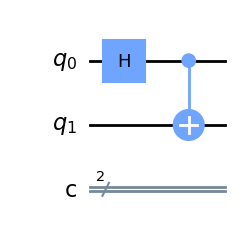

In [51]:
init_state = QuantumCircuit(len(obs), len(obs) )
init_state.h(0)
init_state.cx(0,1)
init_state.draw(output='mpl')

[0.         0.44879895 0.8975979  1.34639685 1.7951958  2.24399475
 2.6927937  3.14159265 3.5903916  4.03919055 4.48798951 4.93678846
 5.38558741 5.83438636 6.28318531]


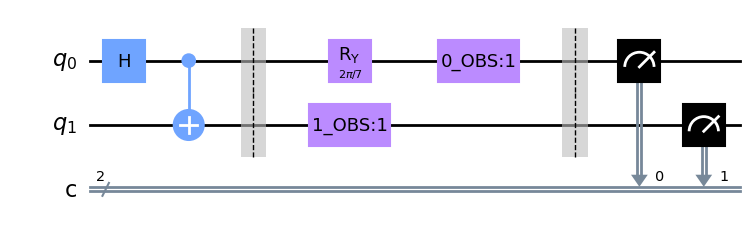

In [52]:

circuits        = CircuitMaker()
bell_circuits   = circuits.constructor( init_state, obs , theta_vec)
bell_circuits[11].draw(output='mpl')


In [57]:
simulator = Aer.get_backend('aer_simulator')
job = simulator.run( bell_circuits )
results = job.result()
counts = results.get_counts()

In [58]:
################################
# Parametrizacion de desigualdad

#Sabxy = [(1,1,-1,1), (1,1,-1,1), (1,1,-1,1), (1,1,-1,1)]
Sabxy = (1,1,-1,1)
S = 2

In [60]:
result = circuits.witness(counts,Sabxy, S)
##print(vered)
#print(result)
#print(counts)

The inequality has been broken in the circuit number 11 with value 2.40625!
The inequality has been broken in the circuit number 12 with value 2.78515625!
The inequality has been broken in the circuit number 13 with value 2.666015625!
The inequality has been broken in the circuit number 14 with value 2.033203125!
